<a href="https://colab.research.google.com/github/The-Algorist/Statistics-and-Visualization-Module-Project-/blob/main/Gideon_Warui_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINANCIAL INCLUSION IN AFRICA**

***Case Study***:  *Kenya, Rwanda, Tanzania, and Uganda.*

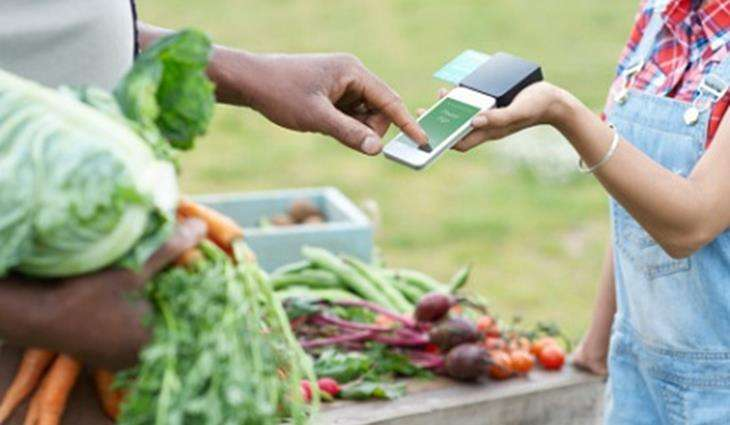

**Introduction**

**Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.





Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. 

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.






**Objectives**

1. To figure out how it can  be predicted which individuals are most likely to have or use a bank account.

2. To provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.



**Dataset**

**Problem Statement**

Is the data provided enough to predict with accuracy if an individual in the said countries is likely to have or use a bank account ?

**Context**

The dataset(s) provided include financial data collected from 4 East African countries, namely : Kenya, Rwanda, Tanzania and Uganda.



**Relevance and Validation**

Given that the data was collected between 2016 and 2018, it is within 5 to 6 years from the current year 2022. It is relevant for our current IP, however for actual analysis the data might be deprecated as from 2018 to 2022 there have been significant changes.

The dataset is valid as confirmed and compared with various sources such as:
 1. FinScope - the organization that collected the data
 2. the data has been used in various competitions on platforms such as kaggle and zindi.


**Column Descriptions**

0.	**country** -	Country interviewee is in.

1. **year** - Year survey was done in.

2.	**uniqueid** -	Unique identifier for each interviewee

3.	**location_type** -	Type of location: Rural, Urban

4.	**cellphone_access** -	If interviewee has access to a cellphone: Yes, No

5.	**household_size** -	Number of people living in one house

6.	**age_of_respondent** -	The age of the interviewee

7.	**gender_of_respondent** -	Gender of interviewee: Male, Female

8.	**relationship_with_head** -	The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

9.	**marital_status** -	The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know

10.	**education_level** -	Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA

11.	**job_type** -	Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont...




---



---



**DATA EXPLORATION**

Loading the necessary python packages

In [2]:
#!pip install --upgrade plotly

In [3]:
#!pip install jupyter-dash

In [4]:
# importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the dataset

In [5]:
data = pd.read_csv('/content/Financial Dataset - 1.csv')

# previewing the data
data.head()

country  year    uniqueid Has a Bank account Type of Location  \
0   Kenya  2018  uniqueid_1                Yes            Rural   
1   Kenya  2018  uniqueid_2                 No            Rural   
2   Kenya  2018  uniqueid_3                Yes            Urban   
3   Kenya  2018  uniqueid_4                 No            Rural   
4   Kenya  2018  uniqueid_5                 No            Urban   

  Cell Phone Access  household_size  Respondent Age gender_of_respondent  \
0               Yes             3.0            24.0               Female   
1                No             5.0            70.0               Female   
2               Yes             5.0            26.0                 Male   
3               Yes             5.0            34.0               Female   
4                No             8.0            26.0                 Male   

  The relathip with head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

               Level of Educuation                Type of Job  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

**The column heads are not named in a similar manner, they require renaming for uniformity and ease of access**

Renaming columns

In [6]:
data.rename(columns = {'Has a Bank account':'has_a_bank_account',
                            'Type of Location':'type_of_location',
                            'Cell Phone Access':'cellphone_access',
                            'Respondent Age':'respondent_age',
                            'The relathip with head':'relationship_with_head',
                            'Level of Educuation':'level_of_education',
                            'Type of Job':'type_of_job'
                            

                            }, inplace = True)
# previewing the column names
data.head(1)

country  year    uniqueid has_a_bank_account type_of_location  \
0   Kenya  2018  uniqueid_1                Yes            Rural   

  cellphone_access  household_size  respondent_age gender_of_respondent  \
0              Yes             3.0            24.0               Female   

  relationship_with_head           marital_status   level_of_education  \
0                 Spouse  Married/Living together  Secondary education   

     type_of_job  
0  Self employed

**Renaming changes have been effected**

In [7]:
#previewing the tail end of the dataset
data.tail()


country  year       uniqueid has_a_bank_account type_of_location  \
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      cellphone_access  household_size  respondent_age gender_of_respondent  \
23519              Yes             4.0            48.0               Female   
23520              Yes             2.0            27.0               Female   
23521              Yes             5.0            27.0               Female   
23522              Yes             7.0            30.0               Female   
23523              Yes            10.0            20.0                 Male   

      relationship_with_head        marital_status   level_of_education  \
23519      Head of Household    Divorced/Seperated  No formal education   
23520      Head of Household  Single/Never Married  Secondary education   
23521                 Parent               Widowed    Primary education   
23522                 Parent    Divorced/Seperated  Secondary education   
23523                  Child  Single/Never Married  Secondary education   

         type_of_job  
23519   Other Income  
23520   Other Income  
23521   Other Income  
23522  Self employed  
23523      No Income

**Shape of dataset**

In [8]:
print('Number of rows    : ', data.shape[0])
print('Number of columns : ', data.shape[1])

Number of rows    :  23524
Number of columns :  13


**The dataset has 23524 entries/rows, it also has 13 columns**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   has_a_bank_account      23488 non-null  object 
 4   type_of_location        23509 non-null  object 
 5   cellphone_access        23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   relationship_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  level_of_education      23495 non-null  object 
 12  type_of_job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**There are some missing values in all of the columns except year and uniqueid**

Identifying and visualizing the missing values

In [10]:
# calculating the sum of missing values in each column
print(data.isnull().sum())
print('')
print('*****************************************')
# percent of missing data
percent_missing =(data.isnull ().sum () * 100) / len (data) 
print(percent_missing)

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cellphone_access          11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64

*****************************************
country                   0.059514
year                      0.000000
uniqueid                  0.000000
has_a_bank_account        0.153035
type_of_location          0.063765
cellphone_access          0.046761
household_size            0.119027
respondent_age            0.144533
gender_of_respondent      0.144533
relationship_with_head    0.017004
marital_status            0.136031
level_of_education        0.123278
type_of_job               0.127529
dtype: float64


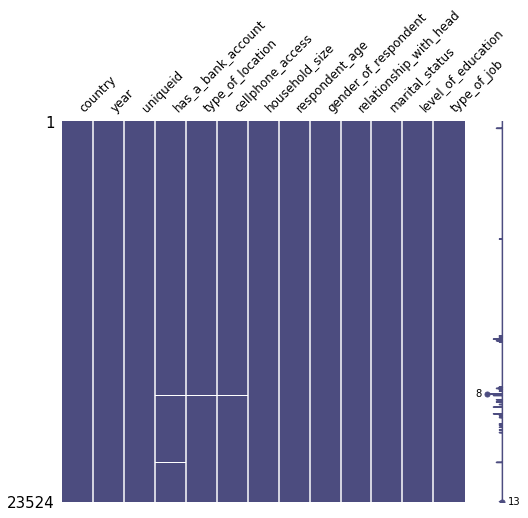

In [11]:
# visualizing the missing data
msno.matrix(data, figsize = (8,7), fontsize = 12, color = (0.3, 0.3, 0.5));

**From the visualization above, it is evident that the missing data accounts for a very small and insignificant portion of the data hence can be dropped**

Dropping missing values

In [12]:
# dropping missing values

data.dropna(inplace = True)

In [13]:
# checking changes have been made

print(data.isnull().sum())

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cellphone_access          0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64


**Data has no missing values**

Checking the data types in the dataset

In [14]:
# checking for types

data.dtypes

country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cellphone_access           object
household_size            float64
respondent_age            float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
level_of_education         object
type_of_job                object
dtype: object


**The dataset has 3 numerical columns( 1 int64 , 2 float64) and 10 categorical columns with object datatype**





Checking number of unique elements in each column

In [15]:
# checking the number of unique values in each column 
data.nunique()

country                      4
year                         6
uniqueid                  8687
has_a_bank_account           2
type_of_location             2
cellphone_access             2
household_size              21
respondent_age              85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
level_of_education           7
type_of_job                 10
dtype: int64

Checking and previewing the specific unique elements in the categorical columns

In [16]:
data.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [17]:
data.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

There are 3 unwanted years( 2029, 2056 and 2039).

They should be dropped

In [18]:
# dropping unwanted years
unwanted_years = [2029,2056,2039]
data = data[data.year.isin(unwanted_years)== False]

In [19]:
# checking for implementation of changes
data.year.unique()

array([2018, 2016, 2017])

The unwanted years have been dropped

In [20]:
# checking for unique values in level of educatiobn
data.level_of_education.unique()


array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

'6' is not an educational level hence it has to be dropped from the dataset

In [21]:
# dropping unwanted educational level
unwanted_education = ['6']
data = data[data.level_of_education.isin(unwanted_education)== False]
# checking changes
data.level_of_education.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

The unwanted education level '6' has been dropped.

In [22]:
# creating a loop to iterate over the rest of the columns
columns = ['has_a_bank_account','type_of_location','cellphone_access','gender_of_respondent','relationship_with_head','marital_status','type_of_job']
for col in columns:
  print(col, data[col].unique())
  print('\n')

has_a_bank_account ['Yes' 'No']


type_of_location ['Rural' 'Urban']


cellphone_access ['Yes' 'No']


gender_of_respondent ['Female' 'Male']


relationship_with_head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


marital_status ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


type_of_job ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']




**The various unique categories in each column can be seen from the above analysis as follows:**
1. **has_a_bank_account** : ['Yes' 'No']


2. **type_of_location** : ['Rural' 'Urban']


3. **cellphone_access** : ['Yes' 'No']


4. **gender_of_respondent** : ['Female' 'Male']


5. **relationship_with_head**: ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


6. **marital_status** : ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


7. **type_of_job** :  ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']

**For the numerical columns except year, unique values were not analysed as they are numbers.**


**The uniqueid column can be dropped for the analysis because it has no effect on the prediction**

**Checking for duplicates**

In [23]:
# checking duplicates
data.duplicated().sum()

0

**Data contains no duplicate values hence no duplicates to be dropped**

In [24]:
# dropping the uniqueid column

data.drop('uniqueid', inplace = True, axis = 1)
data.head(1)

country  year has_a_bank_account type_of_location cellphone_access  \
0   Kenya  2018                Yes            Rural              Yes   

   household_size  respondent_age gender_of_respondent relationship_with_head  \
0             3.0            24.0               Female                 Spouse   

            marital_status   level_of_education    type_of_job  
0  Married/Living together  Secondary education  Self employed

In [25]:
# getting the summary statistics for age and household size columns

data[['respondent_age', 'household_size']].describe()

respondent_age  household_size
count    23313.000000    23313.000000
mean        38.793549        3.688414
std         16.510611        2.280842
min         16.000000        0.000000
25%         26.000000        2.000000
50%         35.000000        3.000000
75%         49.000000        5.000000
max        100.000000       21.000000

**Summary**

1. There are 4 unique countries in the dataset namely: Kenya, Rwanda, Uganda, Tanzania.
2. There are about 23310 entries in the dataset after data cleaning.
3. There are about 6 categories of education in the said countries.
4. The maximum household_size is 21 while the average household size is about 3 to 4 people.
5. The mean age of the interviewees is 38.79 
, the maximum age is 100 years while the minimum is 16 years old.
6. The data majorly consists of categorical data.
7. Duplicates could not be dropped as the data involves categorical data which tends to be repetitive, that is, yes/no answers, levels of education etc.

**UNIVARIATE ANALYSIS**

**Categorical Variables:**
1.  **Nominal** (*variables that have two or more categories, but which do not have an intrinsic order*) 
       - marital_status :
             - Married/Living together 
             - Widowed
             - Single/Never Married 
             - Divorced/Seperated
             - Dont know

       - relationship_with_head :
             - Spouse
             - Head of Household
             - Other relative
             - Child
             - Parent
             - Other non-relatives

       - country :
             - Kenya 
             - Rwanda 
             - Tanzania 
             - Uganda
        
       - type_of_job : 

             - Self employed
             - Government Dependent
             - Formally employed Private
             - Informally employed
             - Formally employed Government
             - Farming and Fishing
             - Remittance Dependent
             - Other Income'
             - Dont Know/Refuse to answer
             - No Income


2. **Dichotomous** (*Nominal variable with only two categories*)
       - has_a_bank_account : 
             - Yes
             - No

       - type_of_location : 
             - Rural 
             - Urban

       - cellphone_access : 
             - Yes
             - No

       - gender_of_respondent : 
             - Female 
             - Male

3. **Ordinal** (*variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked*.)
- level_of_education : 
             - Tertiary education
             - Vocational/Specialised training
             - Secondary education
             - Primary education
             - No formal education
             - Other/Dont know/RTA

**Numeric:**

1. **Continous**               
             - respondent_age 
2. **Discrete**
             - household_size

**Visualizations**

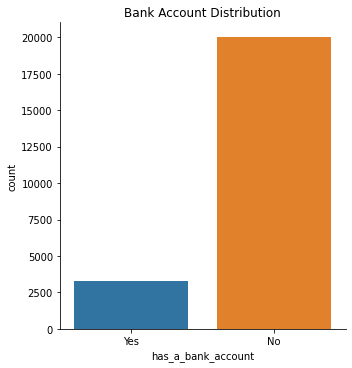

In [26]:
sns.catplot(x="has_a_bank_account", kind="count", data= data)
plt.title("Bank Account Distribution");

**From the plot above, it is evident that between 2016 and 2018 most of the interviewees did not have a bank account**

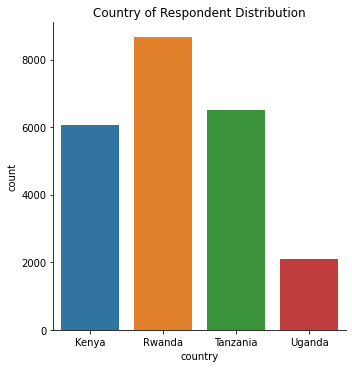

In [27]:
# Explore Country distribution 

sns.catplot(x="country", kind="count", data=data)
plt.title("Country of Respondent Distribution");

**Rwanda as a country contributed the most interviewees as compared to the other countries**

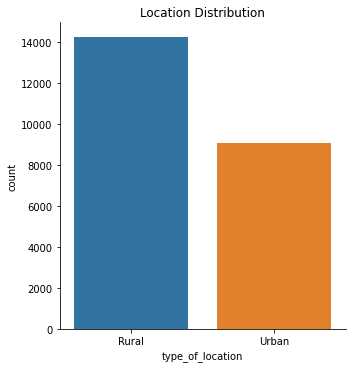

In [28]:
# Explore Location distribution 

sns.catplot(x="type_of_location", kind="count", data=data)
plt.title("Location Distribution");

**The plot above shows that most of the  respondents come from rural locations as compared to those in urban areas**

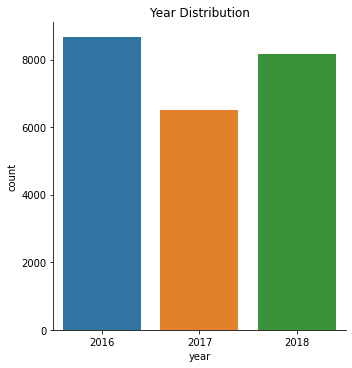

In [29]:
# Explore Years distribution 

sns.catplot(x="year", kind="count", data=data)
plt.title("Year Distribution");

**From the plot above, out of the three years the data was collected, a large amount of the data was collected in 2016.**

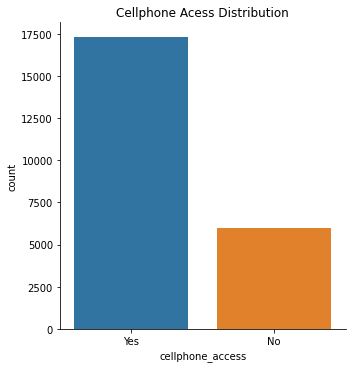

In [30]:
# Explore cellphone_access distribution 

sns.catplot(x="cellphone_access", kind="count", data=data)
plt.title("Cellphone Acess Distribution");

**A large percentage of the respondents had access to cellphones. About 6000 of all interviewees did not have access to cellphones**

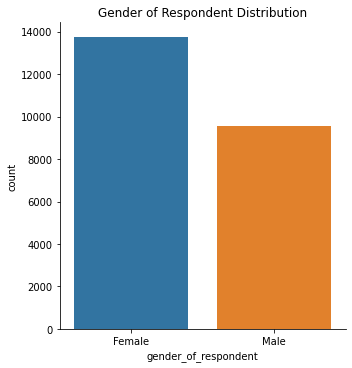

In [31]:
# Explore gender_of_respondents distribution 

sns.catplot(x="gender_of_respondent", kind="count", data=data)
plt.title("Gender of Respondent Distribution");

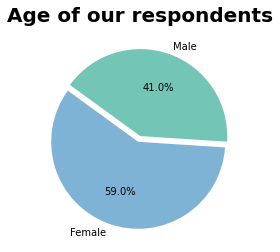

In [32]:
#creating pie chart
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
data['gender_of_respondent'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 ,colors = colors ,explode = (0.07,0),autopct = '%1.1f%%')
plt.title('Age of our respondents', fontsize = 20, fontweight = 'bold', color = 'black')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**In terms of gender, a larger percentage of the dataset was female, with about 9000 males from the data collected**

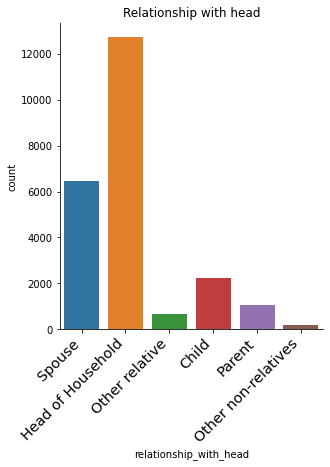

In [33]:
# Explore relationship_with_head distribution 

sns.catplot(x="relationship_with_head", kind="count", data=data);
plt.title("Relationship with head")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

**Most of the interviewees in the said countries were head of their households.
About 6500 of the interviewees were spouses, while the other relationship categories had a low number of respondents**

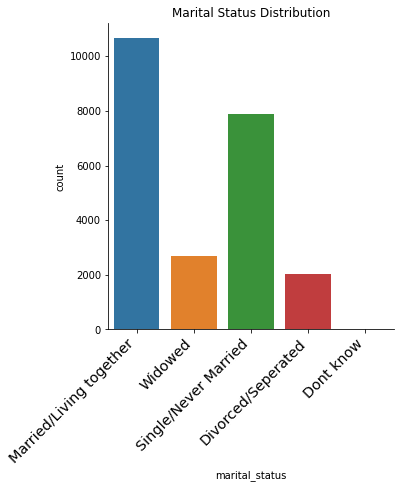

In [34]:
# Explore marital_status  distribution 

sns.catplot(x="marital_status", kind="count", data=data);
plt.title("Marital Status Distribution")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

**From the plot above, it is safe to conclude that, most of the population is either married/living together or single/never married as these are the categories with the most respondents**

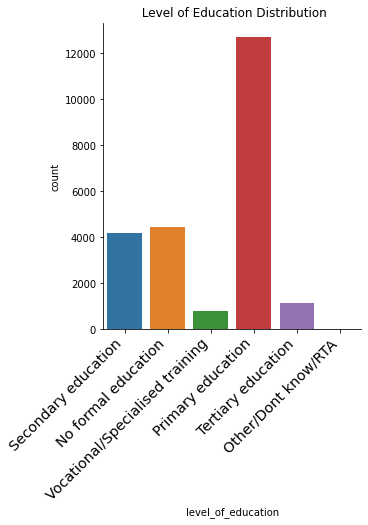

In [35]:

# Explore education_level  distribution 

sns.catplot(x="level_of_education", kind="count", data=data); 
plt.title(" Level of Education Distribution")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

**In the four countries, majority of the population has received primary education , while a minority of the population has received vocational/special training and tertiary education**

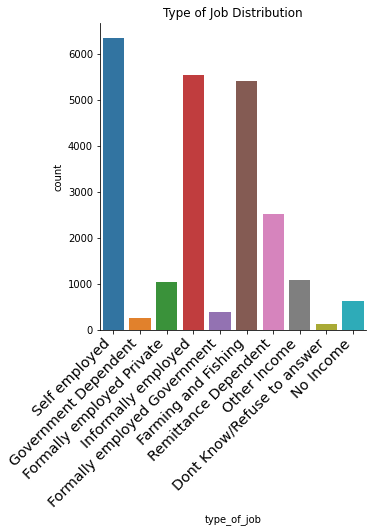

In [36]:
# Explore job_type distribution 


sns.catplot(x="type_of_job", kind="count", data=data); 
plt.title("Type of Job Distribution")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  );

**Majority of the respondents in the four countries are employed, with most of the respondents being self employed**

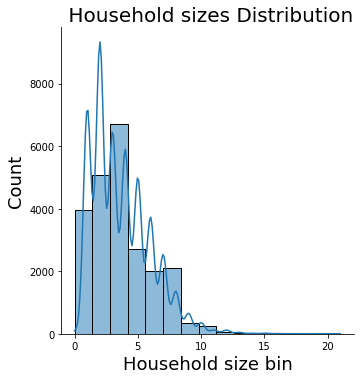

In [37]:
# Explore household_size distribution 

#analysing the household size
sns.displot(data['household_size'], bins = 15,kde = True)
plt.title(' Household sizes Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Household size bin', fontsize = 18);

In [38]:
data.household_size.describe()

count    23313.000000
mean         3.688414
std          2.280842
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

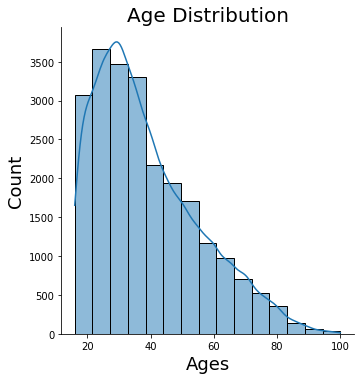

In [39]:

# Explore age_of_respondent distribution

#Analyssing our respondents age
sns.displot(data['respondent_age'],bins = 15,kde = True)
plt.title('Age Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Ages', fontsize = 18)
plt.show()

In [40]:
data.respondent_age.describe()

count    23313.000000
mean        38.793549
std         16.510611
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

In [41]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
   

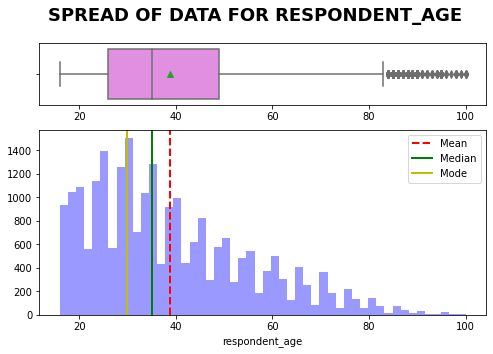

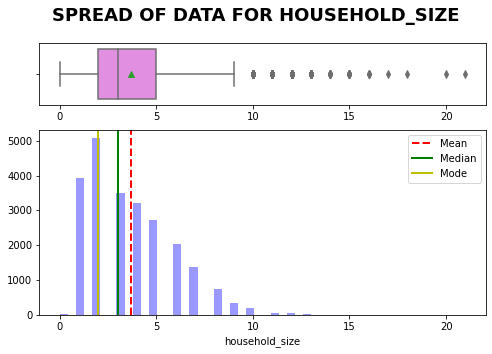

In [42]:
#select all quantitative columns for checking the spread
list_col=['respondent_age','household_size']
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

**Detecting Outliers**

**Convert year to object to avoid finding an outlier for year**

In [43]:
data.year = data.year.astype('object')

(23313, 12)
********************************************
(22700, 12)


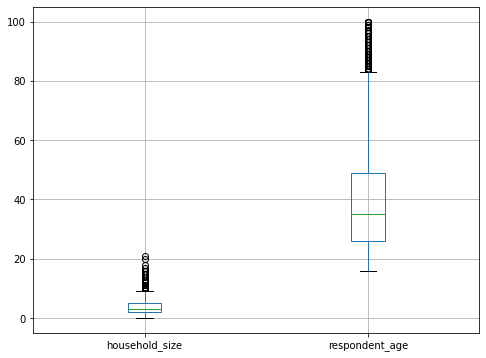

In [44]:
# checking for outliers 
data.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(data.shape)

print("********************************************")

# removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
print(data.shape)

**Visualizing data with outliers removed**

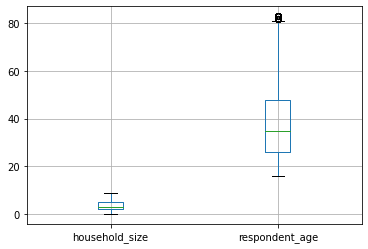

In [45]:
data.boxplot()

**Checking for skewness and kurtosis**

In [46]:
#creating a function to trancuate floats
def mytrim(float_number, length):
    if isinstance(float_number, float):
        num =str(float_number)
        digits =num.split(".")
        return_str =float(digits[0] +"." +str(digits[1])[:length])
        return return_str

#checking on the skewness of the data 
from scipy import stats
y = mytrim(stats.skew(data['respondent_age']), 4)
print('The skewness of the respondents age is ' + str(y))
if y > 0:
    print('\nThe tail on the right side is greater than that on the left side the mean is greater than mode.')
else:
    print('The tail on the left side is greater than that on the right side the mode is greater than teh mean.')

#checking on the Kurtosis 
x = mytrim(stats.kurtosis(data['respondent_age']), 4)
print('\nThe kurtosis of the data is ' + str(x))
if x == 0:
    print('\nThe data displays a normal distribution the data is mesokurtic.')
elif x > 0:
    print('\nThe data is heavy tailed and has high degree of peakedness the data is leptokurtic.')
else:
    print ('\nThe data is light tailed it has a low degree of peakedness the data is platykurtic.')

The skewness of the respondents age is 0.7405

The tail on the right side is greater than that on the left side the mean is greater than mode.

The kurtosis of the data is -0.2361

The data is light tailed it has a low degree of peakedness the data is platykurtic.


In [47]:
#checking on the skewness of the data 
from scipy import stats
y = mytrim(stats.skew(data['household_size']), 4)
print('The skewness of the respondents age is ' + str(y))
if y > 0:
    print('\nThe tail on the right side is greater than that on the left side the mean is greater than mode.')
else:
    print('The tail on the left side is greater than that on the right side the mode is greater than teh mean.')

#checking on the Kurtosis 
x = mytrim(stats.kurtosis(data['household_size']), 4)
print('\nThe kurtosis of the data is ' + str(x))
if x == 0:
    print('\nThe data displays a normal distribution the data is mesokurtic.')
elif x > 0:
    print('\nThe data is heavy tailed and has high degree of peakedness the data is leptokurtic.')
else:
    print ('\nThe data is light tailed it has a low degree of peakedness the data is platykurtic.') 

The skewness of the respondents age is 0.606

The tail on the right side is greater than that on the left side the mean is greater than mode.

The kurtosis of the data is -0.5049

The data is light tailed it has a low degree of peakedness the data is platykurtic.


**Observations**

1. The mean age of the interviewees is 38.79 , the maximum age is 100 years while the minimum is 16 years old. 

2. Majority of the respondents in the four countries are employed, with most of the respondents being self employed

3. In the four countries, majority of the population has received primary education , while a minority of the population has received vocational/special training and tertiary education

4. Between 2016 and 2018 most of the interviewees did not have a bank account

5. Most of the respondents come from rural locations as compared to those in urban areas

6. A large percentage of the respondents had access to cellphones. About 6000 of all interviewees did not have access to cellphones

**BIVARIATE ANALYSIS**

**Distribution of bank accounts per country**

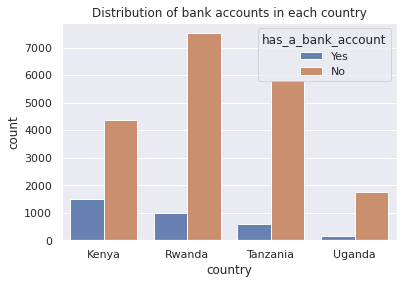

In [48]:
# exploring distribution of bank accounts

sns.set_theme(style="darkgrid", font='sans-serif', context='notebook') #Styles include: darkgrid, ticks
data['country'].value_counts()
sns.set_palette('muted', 10, .75, 'bright')
sns.countplot(x='country',data= data, hue='has_a_bank_account')
plt.title('Distribution of bank accounts in each country');

**Kenya has more people with bank accounts thatn all the other countries. Rwanda has the most people with no bank account (this could be attributed to the huge number of respondents in Rwanda)**

In [49]:
#creating a crosstab for the country and individuals with bank account

df = pd.crosstab(data['country'], data['has_a_bank_account'])
df['percent'] = (df.Yes/(df.Yes + df.No)) * 100
print(df)

has_a_bank_account    No   Yes    percent
country                                  
Kenya               4377  1491  25.408998
Rwanda              7519   976  11.489111
Tanzania            5824   597   9.297617
Uganda              1750   166   8.663883


**25% of Kenyans have a bank account as comapred to 11% in Rwanda and 9% and 8 % in Tanzania and Uganda repectively**

In [50]:
#visualizing the percentages 

bank = pd.crosstab(data['country'], data['has_a_bank_account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
bank



---



---



**Distribution of level of education per country**

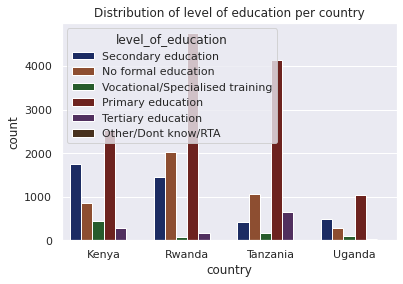

In [51]:

data['country'].value_counts()
sns.set_palette('dark', 10, .75, 'dark')
sns.countplot(x='country',data= data, hue='level_of_education')
plt.title('Distribution of level of education per country');

**In Kenya, there are more people with tertiary education and vocational/special training as compared to the other countries**

**In Rwanda, majority of the population have been able to receive primary education as compred to the other countries**





---



---



**Exporting the clean dataset to csv**

In [52]:
data.to_csv('Clean Financial Dataset.csv', index = False)

**Finding out the distribution of bank accounts with age**

In [53]:

#plotting our dataset
df = pd.read_csv('Clean Financial Dataset.csv')
fig = px.violin(df,y = 'respondent_age', x="country", color="has_a_bank_account", box=True, hover_data=df.columns)
fig.update_layout(title_text="Total bank account distribution per age")
fig.show()




*Hover over the violin plot to view the analysis*

**The plot above alludes that the median age for most people is around age 36**
**This is visible across all the 4 countries**

**The majority of the respodents are under 40 years**

**Most outliers in age are in Rwanda and Tanzania and they do not have a bank account**



---



---



**Checking education level of respodents and having bank accounts**

In [54]:
#checcking on the percentage

bank = pd.crosstab(data['level_of_education'], data['has_a_bank_account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
bank

**Regardless of level of education, a majority of people do not have bank accounts**



---



---



**Job Analysis**

In [55]:
#creating a cross table to summarize the information
job = pd.crosstab(data['type_of_job'], data['has_a_bank_account'])
job['percent'] = (job.Yes/(job.Yes + job.No)) * 100
print(job)

has_a_bank_account              No  Yes    percent
type_of_job                                       
Dont Know/Refuse to answer     104   14  11.864407
Farming and Fishing           4676  620  11.706949
Formally employed Government    85  297  77.748691
Formally employed Private      470  564  54.545455
Government Dependent           168   40  19.230769
Informally employed           5040  436   7.962016
No Income                      569   13   2.233677
Other Income                   843  182  17.756098
Remittance Dependent          2144  229   9.650232
Self employed                 5371  835  13.454721


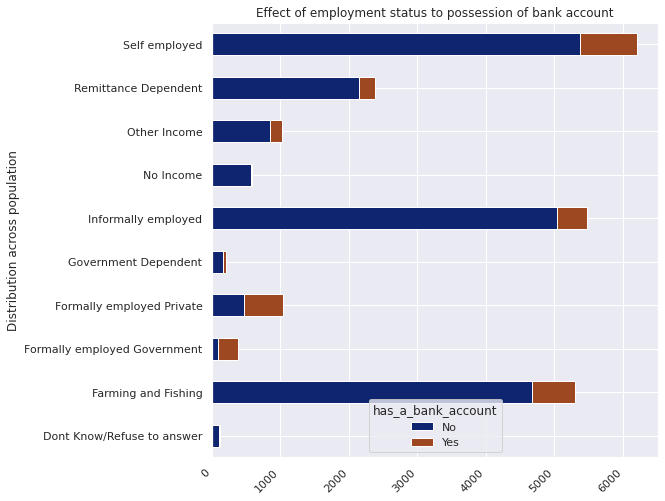

In [56]:
# plot chart from the dataframe
job = pd.crosstab(data['type_of_job'], data['has_a_bank_account'])
job.plot(kind="barh", figsize=(8,8), stacked=True)
# labelling chart
plt.title("Effect of employment status to possession of bank account")
plt.ylabel("Distribution across population")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
      );

**77% of those who are formally employed by the government have bank accounts while 54% of those formally employed private have a bank account**



---



---



**Distribution of bank accounts per type of location**

has_a_bank_account     No   Yes
type_of_location               
Rural               12183  1613
Urban                7287  1617




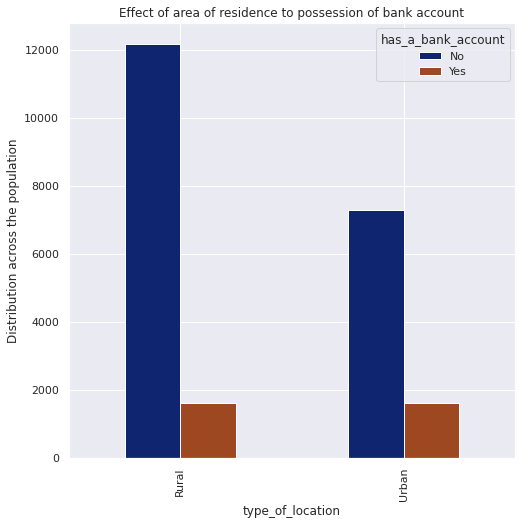

In [57]:
# create crosstab dataframe
location_bank = pd.crosstab(index=data['type_of_location'], columns=data['has_a_bank_account'])
print(location_bank)

print('\n')
# plot chart
location_bank.plot(kind="bar", figsize=(8,8))
# label chart
plt.title("Effect of area of residence to possession of bank account")
plt.ylabel("Distribution across the population");

**Evidently, from the plot above, location merely influences the bank account ownership status**

**The difference between those who own bank accounts in rural areas and those in urban areas is only 31 people**



---



---



**Distribution of bank accounts per cellphone access**

has_a_bank_account     No   Yes
cellphone_access               
No                   5638    93
Yes                 13832  3137




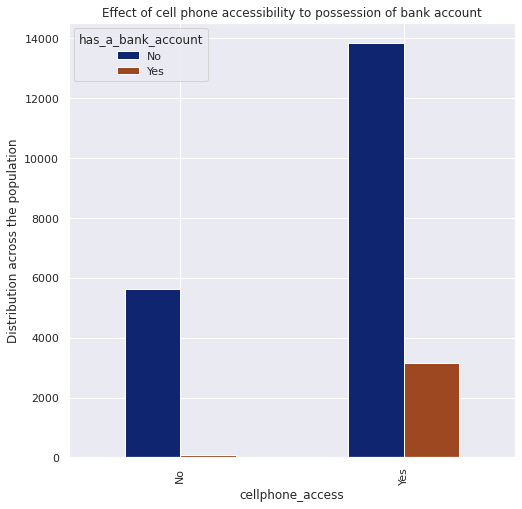

In [58]:
# create crosstab dataframe
cellphone_bank = pd.crosstab(index=data['cellphone_access'], columns=data['has_a_bank_account'])
print(cellphone_bank)

print('\n')

# plot chart
cellphone_bank.plot(kind="bar", figsize=(8,8))

# labelling chart
plt.title("Effect of cell phone accessibility to possession of bank account")
plt.ylabel("Distribution across the population");

In as much as most of the population has cellphone access, the number of bank accounts owned by people with cellphone access is low

****

**Effect of marital status and possession of bank account**

has_a_bank_account         No   Yes
marital_status                     
Divorced/Seperated       1797   230
Dont know                   6     2
Married/Living together  8591  1825
Single/Never Married     6801   945
Widowed                  2275   228




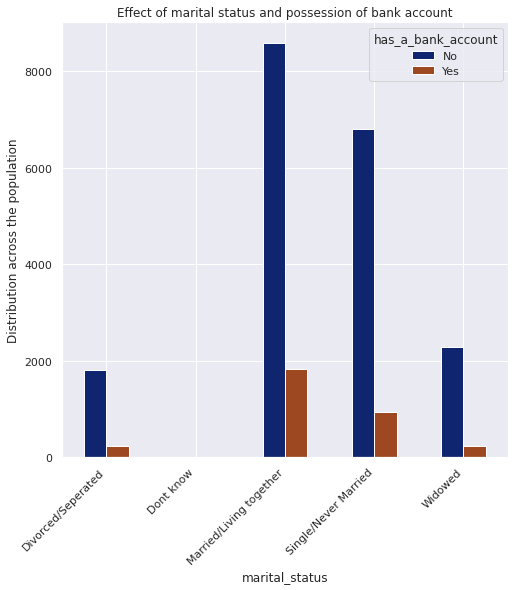

In [59]:
# create crosstab dataframe
marital_bank = pd.crosstab(index=data['marital_status'], columns=data['has_a_bank_account'])
print(marital_bank)

print('\n')
# plot chart
marital_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling
plt.title("Effect of marital status and possession of bank account")
plt.ylabel("Distribution across the population")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
);

**In the plot above, it seems that most of the people with bank accounts are either married or single**

**Married people may have need for bank account due to savings for emergencies as well as future plans**



---



**Relation of respondent's relationship with head of household to possession of bank account**

has_a_bank_account         No   Yes
relationship_with_head             
Child                    1946   185
Head of Household       10171  2217
Other non-relatives       161    19
Other relative            576    64
Parent                    953    58
Spouse                   5663   687




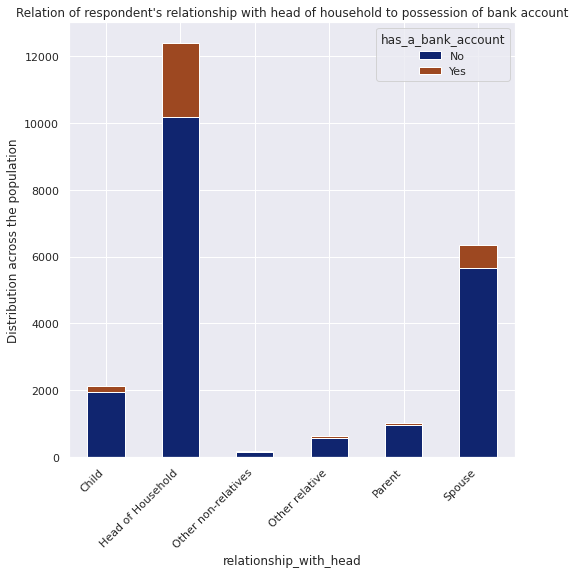

In [60]:
# create crosstab dataframe
relation_withhead_bank = pd.crosstab(index=data['relationship_with_head'], columns=data['has_a_bank_account'])
print(relation_withhead_bank)

print('\n')
# plot chart
relation_withhead_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Relation of respondent's relationship with head of household to possession of bank account")
plt.ylabel("Distribution across the population")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
);

**A good number of household heads have bank accounts followed by spouses.**

**Despite thise, the larger population does not own a bank account**



---



---



**Effect of household size to possession of bank account**

has_a_bank_account    No  Yes
household_size               
0.0                   26    1
1.0                 3177  665
2.0                 4382  620
3.0                 2971  500
4.0                 2707  469
5.0                 2292  410
6.0                 1748  267
7.0                 1196  177
8.0                  654   85
9.0                  317   36




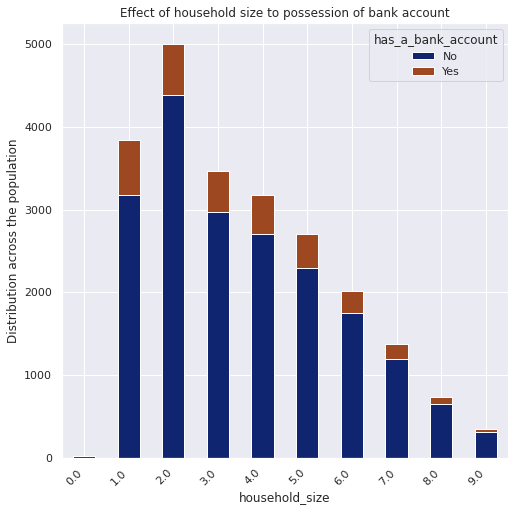

In [61]:
# create crosstab dataframe
housesize_bank = pd.crosstab(index=data['household_size'], columns=data['has_a_bank_account'])
print(housesize_bank)

print('\n')

# plot chart
housesize_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Effect of household size to possession of bank account")
plt.ylabel("Distribution across the population")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
);

**Mapping the categorical variables**

In [62]:
variable_changes ={'Yes':1,'No':0,'Rural':0,'Urban':1, 'Male':0,'Female':1,
                   'Head of Household':0,'Spouse':1,'Child':2,'Parent':3,
                   'Other relative':4,'Other non-relatives':5,'Dont know':6,
                   'Married/Living together':0,'Divorced/Seperated':1,'Widowed':2, 
                   'Single/Never Married':3,'Don’t know':4,'No formal education':0, 
                   'Primary education':1,'Secondary education':2,'Vocational/Specialised training':3, 
                   'Tertiary education':4,'Other/Dont know/RTA':5,'Farming and Fishing':0,
                   'Self employed':1,'Formally employed Government':2,'Formally employed Private':3, 
                   'Informally employed':3,'Remittance Dependent':4,'Government Dependent':5, 
                   'Other Income':6,'No Income':7,'Dont Know/Refuse to answer':8,
                   'Rwanda':0,'Tanzania':1,'Kenya':2,'Uganda':3}
data =  data.replace(variable_changes)

**Plotting the correlation matrix**

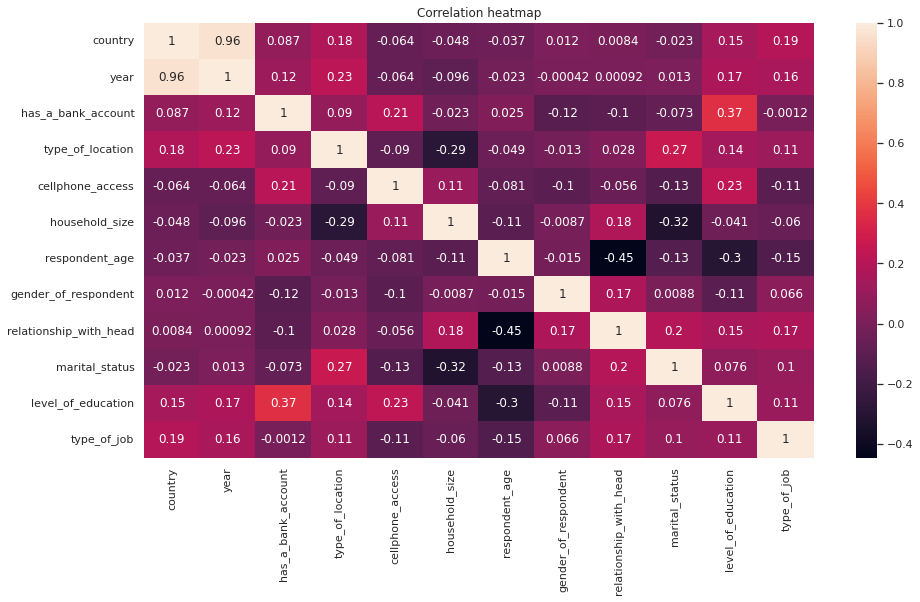

In [63]:
corrMatrix = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix, annot = True)
plt.title('Correlation heatmap')
plt.show()

**Getting the highest correlated variables**

In [64]:
def get_redundant_pairs(data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
country             year                      0.964915
respondent_age      relationship_with_head    0.447093
has_a_bank_account  level_of_education        0.368260
household_size      marital_status            0.319160
respondent_age      level_of_education        0.296242
type_of_location    household_size            0.286110
                    marital_status            0.265736
cellphone_access    level_of_education        0.234819
year                type_of_location          0.225057
has_a_bank_account  cellphone_access          0.209709
dtype: float64


**From the correlation plot above, the highest correlation elements are as follows:**

Top Absolute Correlations:

       - country             year                      0.964915

       - respondent_age      relationship_with_head    0.447093

       - has_a_bank_account  level_of_education        0.368260

       - household_size      marital_status            0.319160

       - respondent_age      level_of_education        0.296242

       - type_of_location    household_size            0.286110

                             marital_status            0.265736

                    
       - cellphone_access    level_of_education        0.234819

       - year                type_of_location          0.225057

       - has_a_bank_account  cellphone_access          0.209709

**Observations**

1. After bivariate analysis by country, it was found that:

2. Rwanda recorded a huge number of individuals without a bank account. Kenya however, recorded a relatively high number of individuals possessing a bank account.
3. the distribution of accessibility to cell phone was fairly distributed across the countries with Tanzania having a relatively huge population with no access to a cell phone
most respondents from Tanzania reside in urban areas, while in Rwanda a huge population live in rural areas
4. in Tanzania, most respondents live in household sizes of 1 or 2 people
5. most respondents in Kenya, Rwanda and Uganda are married while in Uganda, a huge population are single/never married
6. a huge population of the respondents from Kenya and Rwanda do farming and fishing as their income source, while in Uganda and Tanzania,a huge population are self-employed
7. most individuals who had gone through higher education i.e. tertiary level or vocational training, have/use a bank account, hence the bars are almost equal
8. a huge population of individuals of ages 30, 35, 40, 42 had bank accounts
9. as much as females dominated the respondents population, males who have/use a bank account were relatively more than the females who use a bank account
10. most respondents who are married have a bank account followed by those who are single
11. more individuals that are self employed have a bank account, followed by farmers, formally employed privately and informally employed
12. area of residence did not have a huge effect on bank account possession as more individuals living in the rural areas had a bank account compared to those in urban areas
13. individuals who live in households with a smaller size tend to own a bank account
14. more individuals that have access to a cell phone have a bank account. This could be due to the accessiblity of mobile banking, online banking services which can be done on the phone.
15. more individuals that are head of household have a a bank account followed by spouses. This could be due to the responsibilities that generally fall onto the head of the household that leads them to budgeting, saving for the future and hence having a bank account to manage finances.

**Multivariate Analysis**

In [65]:
#Adequacy Test
# Before we perform factor analysis,weyou need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

print('\n')
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




(493.44616322270315, 4.7757143377162895e-67)

**With a p result of 0, the test was statistically significant, this inidicates there is sufficuent evidence to assume the observed distribution is not the same as the expected distribution. There might be a relationship betwen the categorical variables**



---



---



**Kaiser-Meyer-Olkin (KMO)** Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

Running KMO

In [66]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)

Getting KMO Value

In [67]:
kmo_model

0.5572892553237841

**KMO value is lesser than 0.6, hence the data is not adequate for factor analysis**



---



---



**Using Linear Discriminant Analysis**

Separating the feature set and the variable

In [68]:
col = 'has_a_bank_account'
X = data.loc[:,data.columns!=col]
y = data.loc[:, data.columns == col]

# viewing the feature set
X.head()

country  year  type_of_location  cellphone_access  household_size  \
0        2  2018                 0                 1             3.0   
1        2  2018                 0                 0             5.0   
2        2  2018                 1                 1             5.0   
3        2  2018                 0                 1             5.0   
4        2  2018                 1                 0             8.0   

   respondent_age  gender_of_respondent  relationship_with_head  \
0            24.0                     1                       1   
1            70.0                     1                       0   
2            26.0                     0                       4   
3            34.0                     1                       0   
4            26.0                     0                       2   

   marital_status  level_of_education  type_of_job  
0               0                   2            1  
1               2                   0            5  
2               3                   3            1  
3               0                   1            3  
4               3                   1            3

In [69]:
# viewing the variable 
y.head()

has_a_bank_account
0                   1
1                   0
2                   1
3                   0
4                   0

Splitting dataset into test and train sets

In [70]:
#Dividing the data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=0)

Scaling the features or normalizing them

In [71]:
#Feature Scaling
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Importing the LDA model from sklearn library

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


**In scikit-learn, LDA is implemented using LinearDiscriminantAnalysis includes a parameter, n_components indicating the number of features we want returned. To figure out what argument value to use with n_components (e.g. how many parameters to keep), we can take advantage of the fact that explained_variance_ratio_ tells us the variance explained by each outputted feature and is a sorted array.**

**Running a LinearDiscriminantAnalysis with n_components set to None to return ratio of variance explained by every component feature, then calculate how many components are required to get above some threshold of variance explained (often 0.95 or 0.99)**

In [73]:
lda = LDA(n_components= None)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

**Creating a List Of Explained Variances**

In [74]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

**Creating a Function Calculating Number Of Components Required To Pass Threshold**

In [75]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

**Running the function with a goal variance of 0.99**

In [76]:
# Run function
select_n_components(lda_var_ratios, 0.99)

1

**The n_component is 1 for every goal variance between 0.95 and 0.99**



---



---



**Running LDA with n_components as 1**

In [77]:
lda = LDA(n_components= 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Training the model and making predictions.
The random forrst classifier is used to evaluate performance of the algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Evaluating the performance of the model using the confusion matrix and finding the accuracy of the model

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[5624  222]
 [ 641  323]]
Accuracy0.8732745961820851


**Conclusion**

**Using n_components as 1, the model is 87.327% accurate in determining an individual who has a bank account**


**PART 2**

**HYPOTHESIS TESTING**

**Case Study**: *Autolib electric car-sharing service company*

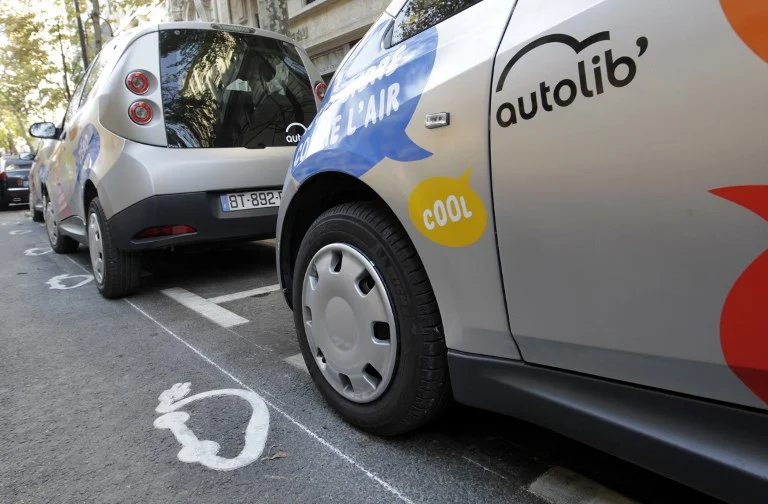

**Introduction**

**Overview**

We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

**Problem Statement**

**Random Variable** to be investigated is the mean of utilib and blue cars on weekends

**Null and Alternate Hypothesis**

H0 : The mean of Blue Cars taken on weekends is equal to the mean of Utilib Cars taken on weekends

Ha: The mean of Blue Cars taken on weekends is different to the mean of Utilib Cars taken on weekend

**Data Description** 

- **Column Definitions**

      - Column name         explanation: 

      - Postal code : postal code of the area (in Paris)

      - date : date of the row aggregation

      - n_daily_data_points : number of daily data points that were available for aggregation, that day

      - dayOfWeek : identifier of weekday (0: Monday -> 6: Sunday)

      - day_type : weekday or weekend

      - BlueCars_taken_sum : Number of bluecars taken that date in that area

      - BlueCars_returned_sum : Number of bluecars returned that date in that area

      - Utilib_taken_sum : Number of Utilib taken that date in that area

      - Utilib_returned_sum : Number of Utilib returned that date in that area

      - Utilib_14_taken_sum : Number of Utilib 1.4 taken that date in that area

      - Utilib_14_returned_sum : Number of Utilib 1.4 returned that date in that area

      - Slots_freed_sum : Number of recharging slots released that date in that area

      - Slots_taken_sum : Number of rechargign slots taken that date in that area


- **Data Source**

The data as provided was sourced from

**Reading and loading data**

In [80]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import pandas_profiling

In [104]:
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df.head()

Postal code      date  n_daily_data_points  dayOfWeek day_type  \
0        75001  1/1/2018                 1440          0  weekday   
1        75001  1/2/2018                 1438          1  weekday   
2        75001  1/3/2018                 1439          2  weekday   
3        75001  1/4/2018                 1320          3  weekday   
4        75001  1/5/2018                 1440          4  weekday   

   BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0                 110                    103                 3   
1                  98                     94                 1   
2                 138                    139                 0   
3                 104                    104                 2   
4                 114                    117                 3   

   Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
0                    2                   10                       9   
1                    1                    8                       8   
2                    0                    2                       2   
3                    2                    9                       8   
4                    3                    6                       6   

   Slots_freed_sum  Slots_taken_sum  
0               22               20  
1               23               22  
2               27               27  
3               25               21  
4               18               20

**Previewing tail end of the dataset**

In [105]:
df.tail()

Postal code       date  n_daily_data_points  dayOfWeek day_type  \
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   
16084        95880  6/19/2018                 1370          1  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
16080                  15                     10                 0   
16081                  19                     19                 0   
16082                  33                     35                 1   
16083                  11                     14                 3   
16084                   2                      2                 2   

       Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
16080                    0                    2                       3   
16081                    0                    2                       1   
16082                    1                    0                       0   
16083                    5                    2                       2   
16084                    1                    0                       0   

       Slots_freed_sum  Slots_taken_sum  
16080                0                0  
16081                0                0  
16082                0                0  
16083                0                0  
16084                0                0

**Determining the number of rows and columns in the dataset**

In [106]:
#Number of records
print('This dataset has {}'.format(df.shape[0]), 'rows and {}'.format(df.shape[1]),'columns')

This dataset has 16085 rows and 13 columns


**This dataset has 16085 rows and 13 columns**



---



---



**Checking the data types in the columns**

In [107]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

**Converting date column to DateTime**

In [108]:
df['date'] =  pd.to_datetime(df['date'] , infer_datetime_format=True)

**Conversion is done**

In [109]:
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

**Checking Overall Data**

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

**Checking missing values**

In [111]:
# Check for missing value
df.isnull().any()


Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

**Data indicates that there are no missing values**



---



---



**Checking for duplicates**

In [112]:
df.duplicated().any()

False

**Data has no duplicated values**



---



---



**Adjusting Column Names**

In [113]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayofweek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   bluecars_taken_sum      16085 non-null  int64         
 6   bluecars_returned_sum   16085 non-null  int64         
 7   utilib_taken_sum        16085 non-null  int64         
 8   utilib_returned_sum     16085 non-null  int64         
 9   utilib_14_taken_sum     16085 non-null  int64         
 10  utilib_14_returned_sum  16085 non-null  int64         
 11  slots_freed_sum         16085 non-null  int64         
 12  slots_taken_sum         16085 non-null  int64 



---



---



In [114]:
df.date = df.date.astype('object')

**Checking and visualizing outliers**

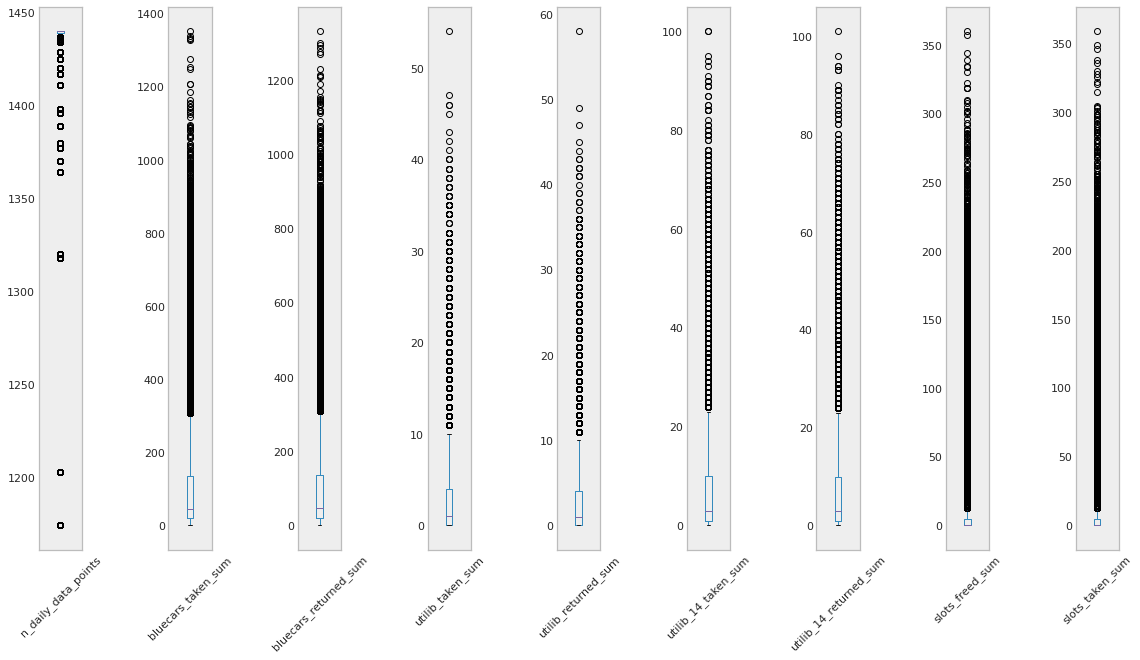

In [115]:
def outlier_visualiser(dataset_name, numeric_columns_list, width=15, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    plt.title("Outlier Plot")
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
col_names = df.drop(['postal_code','date','day_type','dayofweek'],1)
outlier_visualiser(df, col_names.columns)

**Removing Outliers**

In [116]:
# print size of the data with outliers present
print(df.shape)

print("********************************************")

# removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
print(df.shape)

(16085, 13)
********************************************
(16085, 13)


**Changing postal_code to object for now**

In [129]:
df.postal_code = df.postal_code.astype('object')

**Summary Statistics for the numerical columns**

In [130]:
df.describe()

n_daily_data_points     dayofweek  bluecars_taken_sum  \
count         16085.000000  16085.000000        16085.000000   
mean           1431.330619      2.969599          125.926951   
std              33.212050      2.008378          185.426579   
min            1174.000000      0.000000            0.000000   
25%            1439.000000      1.000000           20.000000   
50%            1440.000000      3.000000           46.000000   
75%            1440.000000      5.000000          135.000000   
max            1440.000000      6.000000         1352.000000   

       bluecars_returned_sum  utilib_taken_sum  utilib_returned_sum  \
count           16085.000000      16085.000000         16085.000000   
mean              125.912714          3.698290             3.699099   
std               185.501535          5.815058             5.824634   
min                 0.000000          0.000000             0.000000   
25%                20.000000          0.000000             0.000000   
50%                46.000000          1.000000             1.000000   
75%               135.000000          4.000000             4.000000   
max              1332.000000         54.000000            58.000000   

       utilib_14_taken_sum  utilib_14_returned_sum  slots_freed_sum  \
count         16085.000000            16085.000000     16085.000000   
mean              8.600560                8.599192        22.629033   
std              12.870098               12.868993        52.120263   
min               0.000000                0.000000         0.000000   
25%               1.000000                1.000000         0.000000   
50%               3.000000                3.000000         0.000000   
75%              10.000000               10.000000         5.000000   
max             100.000000              101.000000       360.000000   

       slots_taken_sum  
count     16085.000000  
mean         22.629282  
std          52.146030  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           5.000000  
max         359.000000

**Saving the clean data**

In [117]:
df.to_csv('./autolib_clean.csv')

**UNIVARIATE ANALYSIS**

In [118]:
adf = pd.read_csv('/content/autolib_clean.csv')

In [132]:
# get proprotion of day of week
adf['dayofweek'].value_counts(normalize=True)*100

0    14.759092
1    14.690706
6    14.137395
4    14.118744
2    14.100093
3    14.100093
5    14.093876
Name: dayofweek, dtype: float64

In [133]:
# Describe numerical variables
adf[['bluecars_taken_sum','bluecars_returned_sum']].describe()

bluecars_taken_sum  bluecars_returned_sum
count        16085.000000           16085.000000
mean           125.926951             125.912714
std            185.426579             185.501535
min              0.000000               0.000000
25%             20.000000              20.000000
50%             46.000000              46.000000
75%            135.000000             135.000000
max           1352.000000            1332.000000

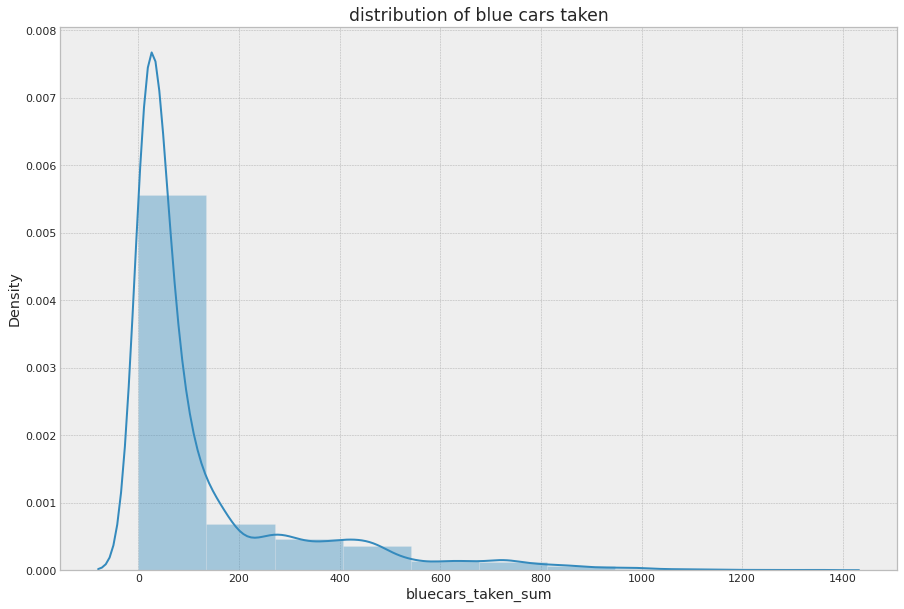

In [136]:
# Plot bluecars taken
sns.distplot(adf['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken');

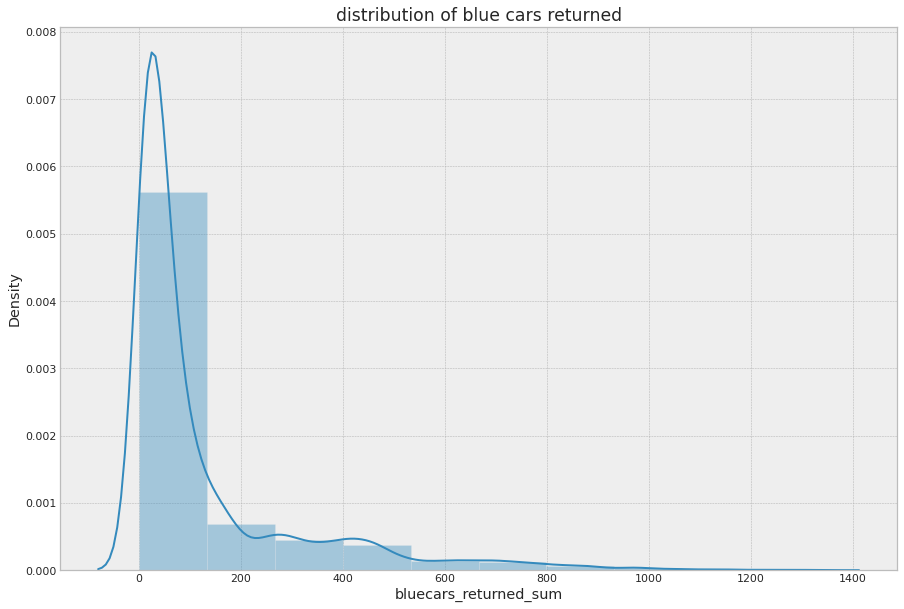

In [138]:
# Plot bluecars returned 
sns.distplot(adf['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned');

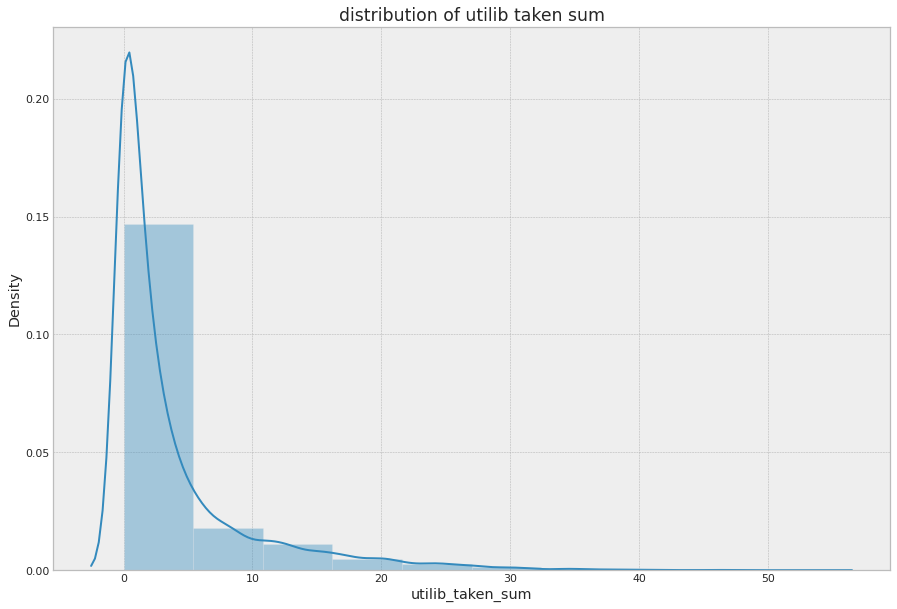

In [139]:
sns.distplot(adf['utilib_taken_sum'], bins=10)
plt.title('distribution of utilib taken sum');

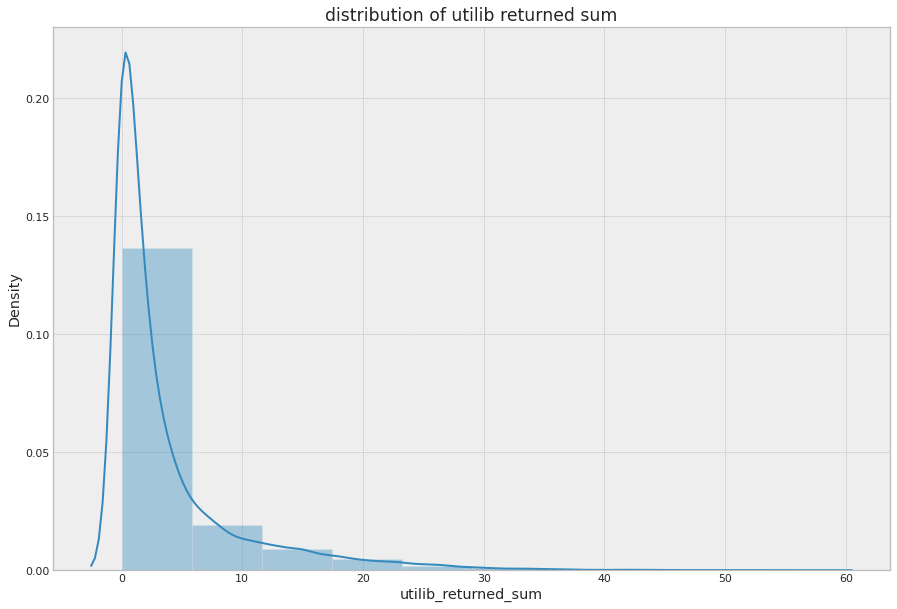

In [140]:
sns.distplot(adf['utilib_returned_sum'], bins=10)
plt.title('distribution of utilib returned sum');

In [143]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
   

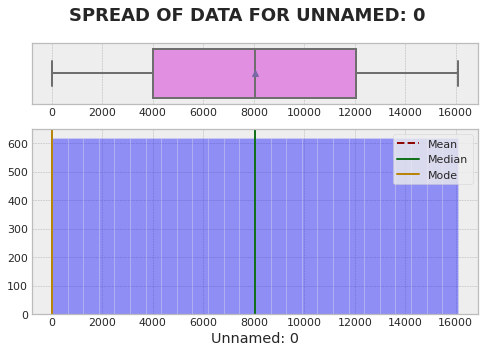

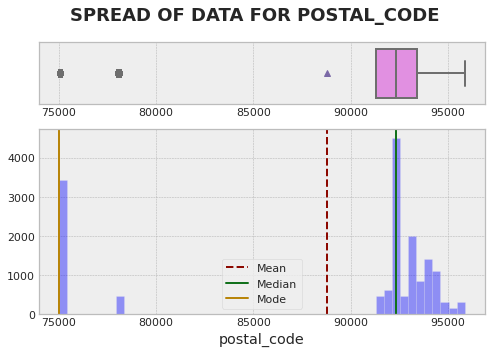

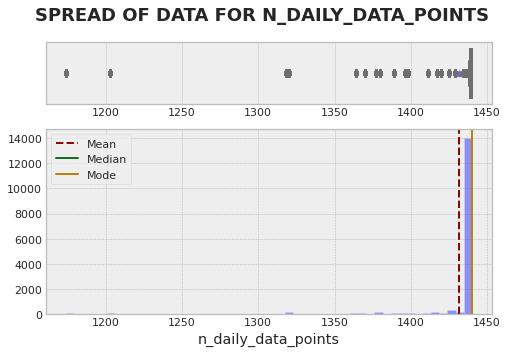

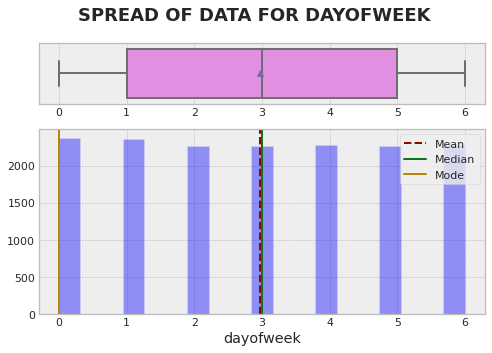

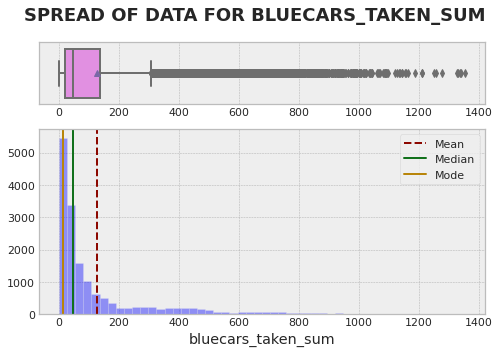

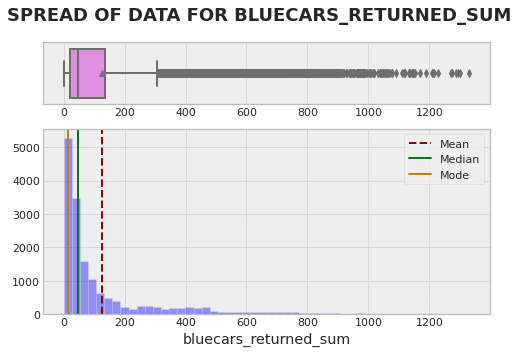

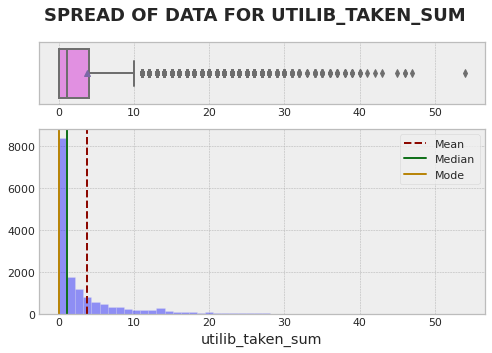

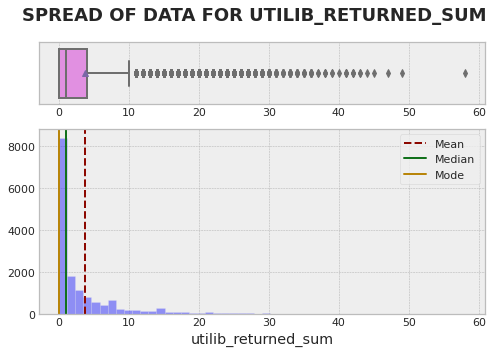

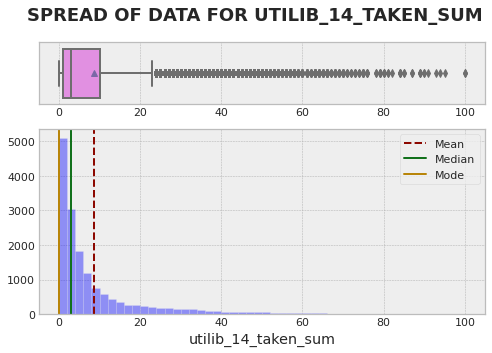

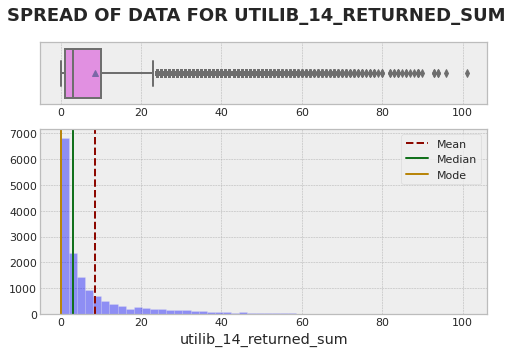

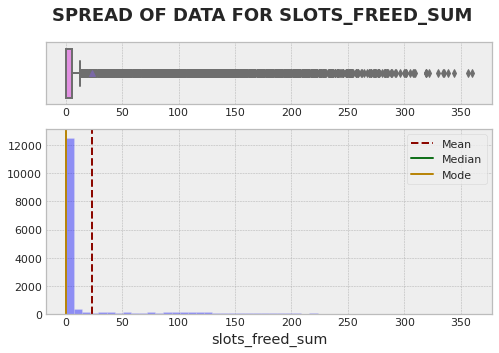

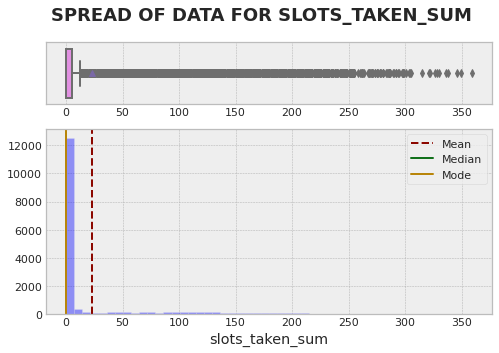

In [144]:
#select all quantitative columns for checking the spread
list_col=  adf.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(adf[list_col[i]])

**BIVARIATE ANALYSIS**

<Figure size 1440x1440 with 0 Axes>

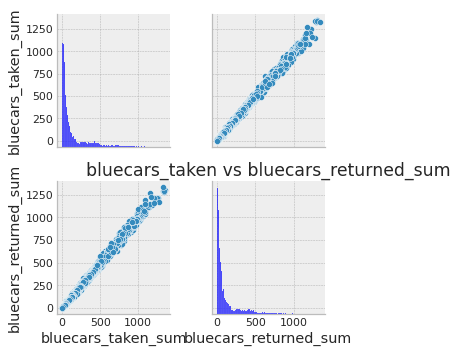

In [150]:
# Determine correlation between numeric features
plt.figure(figsize=(20,20))
sns.pairplot(adf[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum');

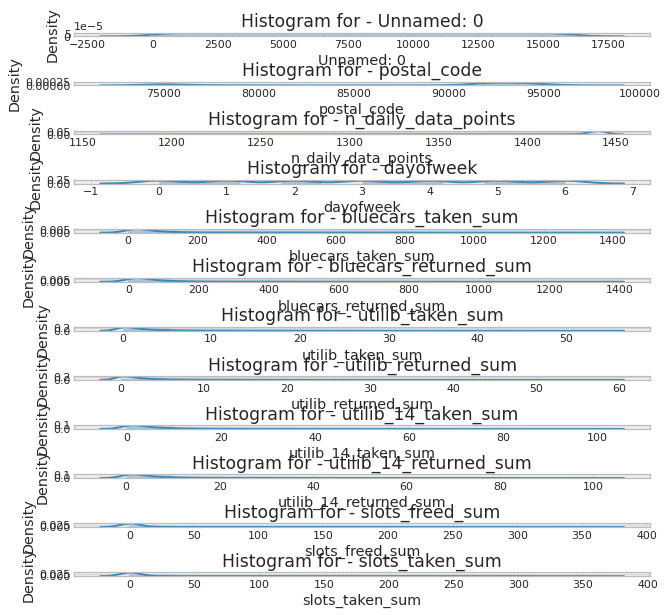

In [155]:
numeric_columns = adf.drop(['date','day_type'],1)

fig,ax = plt.subplots(len(numeric_columns.columns),figsize=(8,10))

for i,col_val in enumerate(numeric_columns.columns):
  sns.distplot(adf[col_val], ax=ax[i], bins=10)
  ax[i].set_title('Histogram for - {}'.format(col_val))
  ax[i].set_xlabel(col_val)

plt.subplots_adjust(left = 1, right= 2,hspace= 12, wspace= 12)

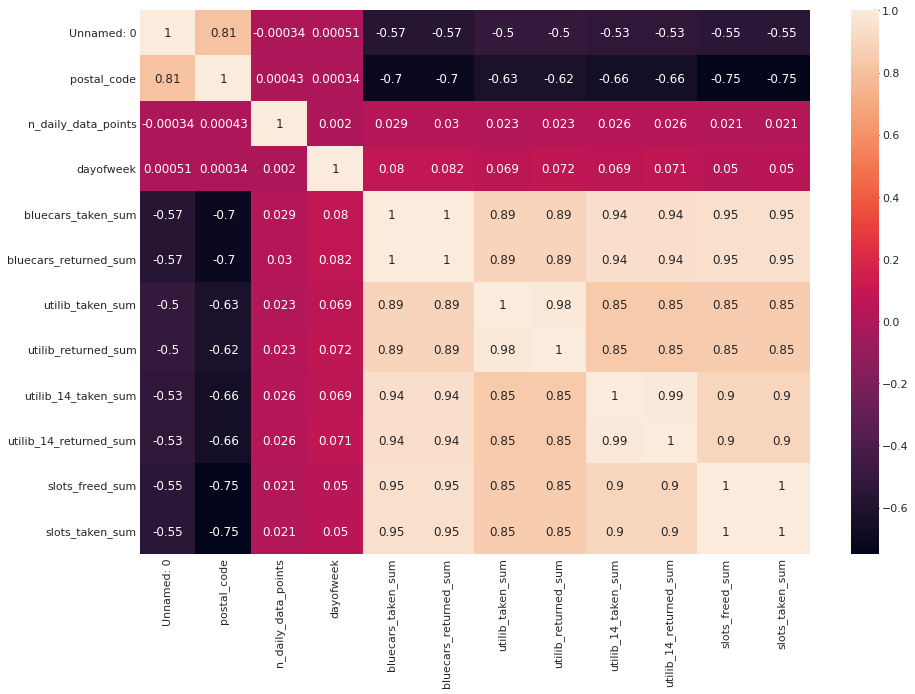

In [156]:
# Correlation in the Numeric Variables
sns.heatmap(adf.corr(),annot=True)

**Hypothesis testing**

Select Sample

In [119]:

def sys_sample(df,r,n):
  k = df.shape[0] // n
  index = [None]* n
  a = r
  index[0] = a

  for i in np.arange(1,n):
    a = a + k
    if a > df.shape[0]:
      a = a - df.shape[0]

    index[i] = a
  return(df.iloc[index])

autolib_sample = sys_sample(adf[adf['day_type'] == 'weekend'], r=5, n=200)
autolib_sample.head()

Unnamed: 0  postal_code                 date  n_daily_data_points  \
20           20        75001  2018-01-21 00:00:00                 1440   
100         100        75001  2018-04-14 00:00:00                 1440   
176         176        75002  2018-01-21 00:00:00                 1440   
256         256        75002  2018-04-14 00:00:00                 1440   
332         332        75003  2018-01-21 00:00:00                 1440   

     dayofweek day_type  bluecars_taken_sum  bluecars_returned_sum  \
20           6  weekend                 143                    150   
100          5  weekend                 219                    219   
176          6  weekend                 210                    213   
256          5  weekend                 293                    292   
332          6  weekend                 313                    307   

     utilib_taken_sum  utilib_returned_sum  utilib_14_taken_sum  \
20                  4                    4                    8   
100                 5                    5                   13   
176                 9                    9                   11   
256                 8                    8                   14   
332                 4                    4                   15   

     utilib_14_returned_sum  slots_freed_sum  slots_taken_sum  
20                        8               23               25  
100                      13               35               35  
176                      12               44               41  
256                      13               56               57  
332                      16               86               87

**Checking whether data is normally distributed**

In [120]:
from scipy.stats import shapiro 

# testing for normality for Bluecars Taken 
stat, p = shapiro(autolib_sample['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.681, p=0.000
Sample does not look Gaussian


In [121]:
# testing for normality for Utilib Cars Taken

stat, p = shapiro(autolib_sample['utilib_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.647, p=0.000
Sample does not look Gaussian


**Perform a T-test**

In [122]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(autolib_sample['bluecars_taken_sum'],autolib_sample['utilib_taken_sum'])

print("This is our p-value", pval)
print("This is value of the ttest", ttest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

This is our p-value 2.5540928228267482e-20
This is value of the ttest 9.760636702716086
We reject the Null Hypothesis


Point Estimation

In [123]:
# Population Mean for BlueCars
population = adf[adf['day_type'] == 'weekend']
population_mean = population['bluecars_taken_sum'].mean()

# The sample mean
sample_mean = autolib_sample['bluecars_taken_sum'].mean()

#point estimator
population_mean - sample_mean

-13.694931733098429

In [124]:
# Population Mean for Utilib
population_mean_ut = population['utilib_taken_sum'].mean()

# The sample mean
sample_mean_ut = autolib_sample['utilib_taken_sum'].mean()

#point estimator
population_mean_ut - sample_mean_ut

-0.536914776480951

Confidence Level

In [125]:
# Confidence level for Blue Cars

#sample size
sample_size = len(autolib_sample['bluecars_taken_sum'])
sample_size

#standard error
std_error = autolib_sample['bluecars_taken_sum'].std()/np.sqrt(sample_size)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between -4.69 and 8.08

(132.70310143707795, 196.86689856292205)

In [126]:
# Confidence level for Utilib Cars

#sample size
sample_size_ut = len(autolib_sample['utilib_taken_sum'])
sample_size_ut

#standard error
std_error_ut = autolib_sample['utilib_taken_sum'].std()/np.sqrt(sample_size_ut)
std_error_ut

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error_ut)

# We can be 95% certain that the population mean data is between 1.42 and 1.96

(163.7268319541455, 165.8431680458545)

**Conclusion**

**We reject our Null Hypothesis of the mean Blue Cars taken on weekends is equal to Utilib Cars taken on weekends because the p-value(p=2.5540928228267482e-20) is less than our significance level 0.05**